## Moduls to install 

In [1]:
# !pip install ipympl
# !pip install wget
# !pip install mitosheet
# !pip install pyjanitor
# !pip install pandas

## Import utilsLaris from github

In [2]:
import os
import wget
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

# Import useful packages

In [1]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
os.environ['NUMEXPR_MAX_THREADS'] = '16'
##############Initialisation parametres#########"
period = "5T"
prefixFiles = {"ElecS219" :"S219*.csv","ElecS114" :"S114*.csv", "Weather" :"WeatherFile*.txt", "Ambiance114": "s114*.txt", "Ambiance219": "s219*.txt"}
dirctory="./Data"
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130', 'sensor_483FDA81E0F4']
# shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130']
shelly_114 = ['sensor_AAC16E','sensor_AA7DBF' ,'sensor_AA8369']

# Ambiance data Importation

In [6]:
utilsLaris.importData(annee ="2022", n_monthStart=2,n_monthEnd=5)

2
3
4
5
start merging
We have  13  sensors. Their Id are  [123, 122, 121, 129, 128, 127, 126, 125, 124, 120, 119, 118, -1]
sensor_123
sensor_122
sensor_121
sensor_129
sensor_128
sensor_127
sensor_126
sensor_125
sensor_124
sensor_120
sensor_119
sensor_118
sensor_-1
We have  14  sensors. Their Id are  [104, 103, 102, 101, 100, 105, 107, 106, 110, 109, 108, 113, 112, 111]
sensor_104
sensor_103
sensor_102
sensor_101
sensor_100
sensor_105
sensor_107
sensor_106
sensor_110
sensor_109
sensor_108
sensor_113
sensor_112
sensor_111
We have  8  sensors. Their Id are  ['AAC16E', 'AA7BF5', '483FDA81E0F4', 'AA9130', 'AA4706', 'AA7DBF', 'AA8369', '483FDA81E0FF']
sensor_AAC16E
sensor_AA7BF5
sensor_483FDA81E0F4
sensor_AA9130
sensor_AA4706
sensor_AA7DBF
sensor_AA8369
sensor_483FDA81E0FF


# Weather data

In [2]:
##  Merge multiple CSV Files into a single Pandas dataframe
################################################################################################################
# merging the files
########################################################wgetwget########################################################
# Data préparation for weatherData
################################################################################################################""
# use dayfirst = True to have correct date
weatherData = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["Weather"])
weatherData = utilsLaris.dataPreparationWeather(weatherData,period = period)

In [3]:
weatherData

,weather_out,weather_hum,weather_bar_,weather_rad_
date,,,,
2022-02-03 14:00:00,6.1,91.0,1019.700000,91.000000
2022-02-03 14:05:00,6.1,91.0,1019.683333,85.833333
2022-02-03 14:10:00,6.1,91.0,1019.666667,80.666667
2022-02-03 14:15:00,6.1,91.0,1019.650000,75.500000
2022-02-03 14:20:00,6.1,91.0,1019.633333,70.333333
...,...,...,...,...
2022-06-01 17:00:00,23.3,35.0,1015.400000,694.000000
2022-06-01 17:05:00,23.6,34.0,1015.300000,659.000000
2022-06-01 17:10:00,23.4,34.0,1015.300000,439.000000


# Electric data

In [4]:
# merge all files csv and do data préparation 
elecData_219 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS219"])
elecData_114 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS114"])
elecData_219 = utilsLaris.dataPreparationElec(elecData_219, period = period)
elecData_114 = utilsLaris.dataPreparationElec(elecData_114, period = period)

In [5]:
elecData_219

,elec_general_219_w,elec_eclairage_219_w
date,,
2022-02-01 00:00:00,273.3875,0.0
2022-02-01 00:05:00,284.7600,0.0
2022-02-01 00:10:00,285.5420,0.0
2022-02-01 00:15:00,279.1620,0.0
2022-02-01 00:20:00,286.4480,0.0
...,...,...
2022-05-31 23:35:00,295.3240,0.0
2022-05-31 23:40:00,302.0440,0.0
2022-05-31 23:45:00,302.0440,0.0


## Read data : Ambiance and windows

In [8]:
#shiftDays est utilisé pour compléter les données des fenêtres par des valeurs close
tab = utilsLaris.readData(period, ShiftDaysWindowsToFill=25,  fillWindows= True)
ResampledDict_s114 = tab[0]
ResampledDict_s219 = tab[1]
ResampledDict_shelly = tab[2]
ambianceData_114 = utilsLaris.dataFusionAmbiance(ResampledDict_s114, salle = 114)
ambianceData_219 = utilsLaris.dataFusionAmbiance(ResampledDict_s219, salle = 219)

In [7]:
ResampledDict_shelly['sensor_AA7BF5'] # ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130', 'sensor_483FDA81E0F4']

,state_AA7BF5
date,
2022-02-28 16:45:00,close
2022-02-28 16:50:00,close
2022-02-28 16:55:00,close
2022-02-28 17:00:00,close
2022-02-28 17:05:00,close
...,...
2022-06-28 15:10:00,close
2022-06-28 15:15:00,close
2022-06-28 15:20:00,close


# Data Fusion : All

In [9]:
dfs_219 = [ambianceData_219,elecData_219,weatherData]
dfs_114 = [ambianceData_114,elecData_114,weatherData]
df_219 = utilsLaris.dataFusionAll(dfs=dfs_219, shelly_sensors=shelly_219,ResampledDict_shelly=ResampledDict_shelly)
df_114 = utilsLaris.dataFusionAll(dfs=dfs_114, shelly_sensors=shelly_114,ResampledDict_shelly=ResampledDict_shelly)


In [15]:
df_219.to_csv("HandlingMissingData/df_219_mars_02_juin.csv")

In [14]:
df_114.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12818 entries, 2022-03-17 11:50:00 to 2022-04-30 23:55:00
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_118               11864 non-null  float64
 1   tvoc_118              11863 non-null  float64
 2   temperature_118       11864 non-null  float64
 3   humidity_118          11864 non-null  float64
 4   light_118             11863 non-null  float64
 5   sound_118             11863 non-null  float64
 6   co2_119               11867 non-null  float64
 7   tvoc_119              11591 non-null  float64
 8   temperature_119       11867 non-null  float64
 9   humidity_119          11867 non-null  float64
 10  light_119             11591 non-null  float64
 11  sound_119             11591 non-null  float64
 12  co2_120               11864 non-null  float64
 13  tvoc_120              11864 non-null  float64
 14  temperature_120       11864 non-nul

In [13]:
df_114.columns

Index(['co2_100', 'tvoc_100', 'temperature_100', 'humidity_100', 'light_100',
       'sound_100', 'co2_101', 'tvoc_101', 'temperature_101', 'humidity_101',
       'light_101', 'sound_101', 'co2_102', 'tvoc_102', 'temperature_102',
       'humidity_102', 'light_102', 'sound_102', 'co2_103', 'tvoc_103',
       'temperature_103', 'humidity_103', 'light_103', 'sound_103', 'co2_104',
       'tvoc_104', 'temperature_104', 'humidity_104', 'light_104', 'sound_104',
       'co2_105', 'tvoc_105', 'temperature_105', 'humidity_105', 'light_105',
       'sound_105', 'co2_106', 'tvoc_106', 'temperature_106', 'humidity_106',
       'light_106', 'sound_106', 'co2_107', 'tvoc_107', 'temperature_107',
       'humidity_107', 'light_107', 'sound_107', 'co2_108', 'tvoc_108',
       'temperature_108', 'humidity_108', 'light_108', 'sound_108', 'co2_109',
       'tvoc_109', 'temperature_109', 'humidity_109', 'light_109', 'sound_109',
       'co2_110', 'tvoc_110', 'temperature_110', 'humidity_110', 'light_110'

In [14]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df_114.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster, grandeurs=["temperature","co2","humidity","sound","tvoc", "light",  "elec","state", "weather"])
colonnesNames

{'temperature': ['temperature_118',
  'temperature_119',
  'temperature_120',
  'temperature_121',
  'temperature_122',
  'temperature_123',
  'temperature_124',
  'temperature_125',
  'temperature_126',
  'temperature_127',
  'temperature_128',
  'temperature_129'],
 'co2': ['co2_118',
  'co2_119',
  'co2_120',
  'co2_121',
  'co2_122',
  'co2_123',
  'co2_124',
  'co2_125',
  'co2_126',
  'co2_127',
  'co2_128',
  'co2_129'],
 'humidity': ['humidity_118',
  'humidity_119',
  'humidity_120',
  'humidity_121',
  'humidity_122',
  'humidity_123',
  'humidity_124',
  'humidity_125',
  'humidity_126',
  'humidity_127',
  'humidity_128',
  'humidity_129'],
 'sound': ['sound_118',
  'sound_119',
  'sound_120',
  'sound_121',
  'sound_122',
  'sound_123',
  'sound_124',
  'sound_125',
  'sound_126',
  'sound_127',
  'sound_128',
  'sound_129'],
 'tvoc': ['tvoc_118',
  'tvoc_119',
  'tvoc_120',
  'tvoc_121',
  'tvoc_122',
  'tvoc_123',
  'tvoc_124',
  'tvoc_125',
  'tvoc_126',
  'tvoc_127',
 

In [15]:
list(colonnesNames.keys())

['temperature',
 'co2',
 'humidity',
 'sound',
 'tvoc',
 'light',
 'elec',
 'state',
 'weather']

['weather_out', 'weather_hum', 'weather_bar_', 'weather_rad_']


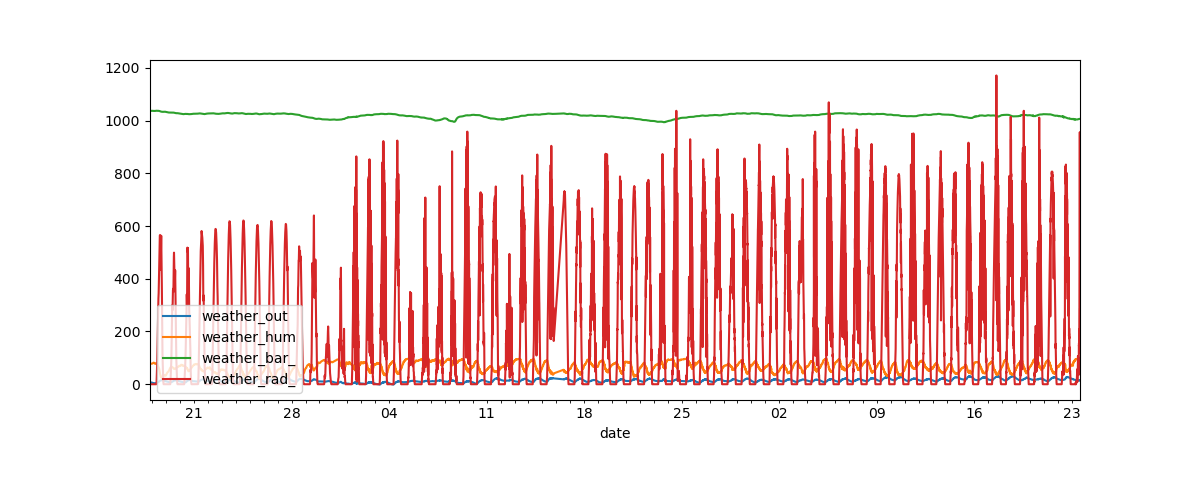

In [16]:
colonnesName = colonnesNames['weather']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [17]:
colonnesNames
targets = ["co2", "temperature"]
resutilsLarist = [colonnesNames[key] for key in colonnesNames.keys() if key in targets]

In [18]:
resutilsLarist

[['temperature_118',
  'temperature_119',
  'temperature_120',
  'temperature_121',
  'temperature_122',
  'temperature_123',
  'temperature_124',
  'temperature_125',
  'temperature_126',
  'temperature_127',
  'temperature_128',
  'temperature_129'],
 ['co2_118',
  'co2_119',
  'co2_120',
  'co2_121',
  'co2_122',
  'co2_123',
  'co2_124',
  'co2_125',
  'co2_126',
  'co2_127',
  'co2_128',
  'co2_129']]

In [ ]:
from sklearn.ensemble import IsolationForest
X =x.iloc[:,0:]

clf = IsolationForest(random_state=0).fit(X)
y=clf.predict(X)

# Detect outliersset_index

In [ ]:
filt_df= df_114.copy()
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


## deal with outliers?

In [ ]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))


In [ ]:
raw_data.drop(['id'], axis=1).head()

# Analyse measured data

In [ ]:
corr = df_114.corr()
corr
raw_data=df_114.copy()

sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [ ]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [ ]:
print(sensor_100.shape, sensor_101.shape)

In [ ]:
sensor_103.id

In [ ]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

In [ ]:
sensor_100_

In [ ]:
sensor_100_['2022-03-02'].co2.plot()

In [ ]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [ ]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()
hawks = sensor_100_

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    mutilsLaristiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:

ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()

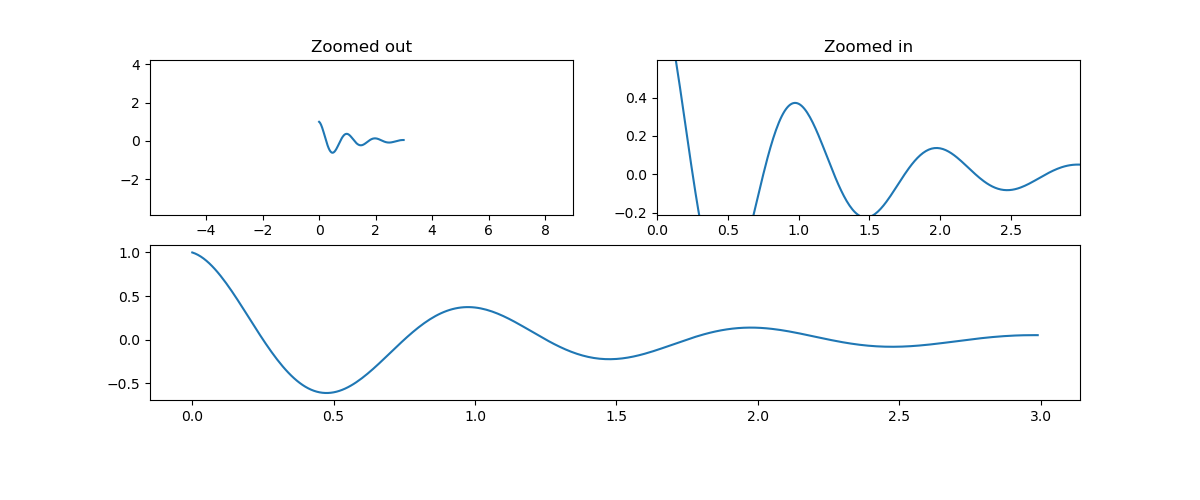

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # DefautilsLarist margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [ ]:
# Importing
import sklearn
import pandas as pd 
# Load the dataset
bos_hou = raw_data.copy() 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

In [ ]:
df_boston.max()

In [ ]:
#!pip list

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(ambianceData_219)

X_test = ambianceData_219
# the model learns that the second feature is double the first
a = np.round(imp.transform(X_test))